# Data Set Information:

Age, Systolic Blood Pressure as SystolicBP, Diastolic BP as DiastolicBP, Blood Sugar as BS, Body Temperature as BodyTemp, HeartRate and RiskLevel. All these are the responsible and significant risk factors for maternal mortality, that is one of the main concern of SDG of UN.


Attribute Information:

Age: Any ages in years when a women during pregnant.
SystolicBP: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
DiastolicBP: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.
BS: Blood glucose levels is in terms of a molar concentration, mmol/L.
HeartRate: A normal resting heart rate in beats per minute.
Risk Level: Predicted Risk Intensity Level during pregnancy considering the previous attribute.

# IMPORTING LIBRARIES

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

# READING THE DATASET 

In [3]:
df=pd.read_csv('Maternal Health Risk Data Set.csv')

In [4]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [5]:
df.shape

(1014, 7)

In [6]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


# There is one column which is in object and rest of the columns are in numeric

In [8]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

# There are no null values and missing values in the dateset

# EXPLORATION DATA ANALYSIS

<AxesSubplot:xlabel='DiastolicBP', ylabel='Count'>

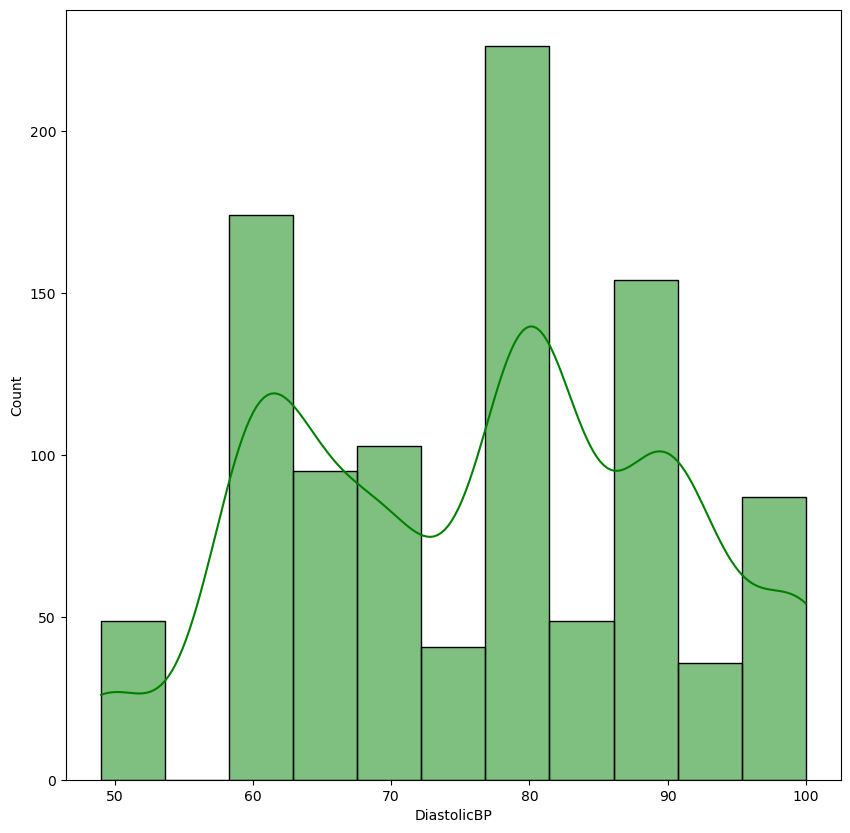

In [9]:
plt.figure(figsize=(10,10))
sns.histplot(df['DiastolicBP'],color ='g', kde=True)

In [10]:
df['RiskLevel'].value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

In [11]:
df['RiskLevel'].count()

1014

In [12]:
x = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

In [13]:
x.shape , y.shape

((1014, 6), (1014,))

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['RiskLevel']= le.fit_transform(df['RiskLevel'])

In [15]:
y = df['RiskLevel']

In [16]:
df['RiskLevel'].unique()

array([0, 1, 2])

In [25]:
#0- high risk
#1- low risk
#2- mid risk

In [26]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   int32  
dtypes: float64(2), int32(1), int64(4)
memory usage: 51.6 KB


In [1]:
from sklearn.preprocessing import StandardScaler
std_scale= StandardScaler()
df_StdScale = std_scale.fit_transform(x)
df_StdScale

NameError: name 'x' is not defined

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(df_StdScale,y, test_size=0.3, stratify=y, random_state=123)

In [30]:
x_train.shape, y_train.shape

((709, 6), (709,))

In [22]:
x_test.shape, y_test.shape

((305, 6), (305,))

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logreg.score(x_test,y_test)

0.6557377049180327

In [25]:
y_pred = logreg.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1,
       1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 2,
       1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 1, 2,
       0, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 0, 1, 2,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 0, 0, 2,
       1, 1, 2, 0, 0, 2, 2, 2, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 2, 2, 1,
       0, 2, 1, 2, 1, 0, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1,
       0, 1, 2, 1, 1, 0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 1, 1, 1, 0, 2, 2, 0,
       0, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2,
       1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       2, 2, 1, 1, 1, 1, 2, 2, 0, 1, 0, 2, 0, 1, 2, 2, 0, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 1, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1,

In [26]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 59   5  18]
 [  4 102  16]
 [ 12  50  39]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75        82
           1       0.65      0.84      0.73       122
           2       0.53      0.39      0.45       101

    accuracy                           0.66       305
   macro avg       0.66      0.65      0.64       305
weighted avg       0.65      0.66      0.64       305



In [27]:
## KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [28]:
y_pred = knn.predict(x_test)

In [29]:
y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1,
       1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 1, 1, 0, 1,
       1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 2,
       2, 1, 1, 0, 0, 0, 2, 1, 2, 1, 1, 0, 0, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 2, 0, 0, 2, 2, 0, 1, 1, 2, 0, 2, 0, 0, 2, 0, 1, 1, 1, 1,
       0, 2, 1, 2, 1, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 1,
       0, 1, 1, 2, 2, 0, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 2,
       0, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2,
       1, 0, 1, 0, 1, 2, 2, 2, 0, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 2, 0, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 1, 1,
       1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1,

In [30]:
knn.score(x_test, y_test)

0.7081967213114754

In [31]:
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)})

In [32]:
gridsearch.best_params_

{'n_neighbors': 1}

In [33]:
y_pred = gridsearch.predict(x_test)

In [34]:
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[ 71   3   8]
 [  4 101  17]
 [  4  14  83]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        82
           1       0.86      0.83      0.84       122
           2       0.77      0.82      0.79       101

    accuracy                           0.84       305
   macro avg       0.84      0.84      0.84       305
weighted avg       0.84      0.84      0.84       305



In [35]:
GD = GridSearchCV(estimator=KNeighborsClassifier(),
param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']},cv=2)

In [36]:
GD.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [37]:
GD.best_params_

{'n_neighbors': 8, 'weights': 'distance'}

In [38]:
y_pred = GD.predict(x_test)

In [39]:
import numpy as np
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(GD, x_train, y_train, cv=2)
print(np.mean(cv_results))

0.7475570939762871
